#**WEB-SCRAPING PROJECT ON WORLD POPULATION**
-----------------------------------------------------------------



#part-1:
1.   Many times in real life we have to get information from the web pages which may be in a different format such as text and tables.
2.   To complete this project you have to scrape population data from Worldmeters website 
3.URL=https://www.worldometers.info/world-population/population-by-country/

#**Countries in the world by population (2022)**:


1.This list includes both countries and dependent territories.

2.Data based on the latest United Nations Population Division estimates.

-------------------------------------------------------------------

#**ATTRIBUTES INFORMATION:**


|Varibles_Name|Description|
|-|-|                                   
|Country(or Dependency)|Name Of The Country|
|Population(2020)|Population Of A Country In A Given Year|
|Yearly Change|Change In Population In Current Year|
|Net Change|Annual Changes In Population|
|Density(P/km2)|Population Density|
|Land Area(km2)|Land Area In Kilometer Square|
|Migrants(net)| Net Migrants|
|Fert.Rate|Fertility Rate In Percentage|
|Med.Age|Population Of Median Age|
|Urban Pop(%)|Urban Population Percentage|
|World Share|World Share In Population Percentage|






In [2]:
#Importing libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

#**1. Please scrape the table properly using BeautifulSoup.**

In [3]:
# download the contents of web page 
url = "https://www.worldometers.info/world-population/population-by-country/"
page_data = requests.get(url).text


In [4]:
#create beautiful soap object
url = "https://www.worldometers.info/world-population/population-by-country/"
parsed_data = BeautifulSoup(page_data, 'html.parser')


In [6]:
#Verify table and classes
print('Classes of each table:')
for table in parsed_data.find_all('table'):
    print(table.get('class'))

Classes of each table:
['table', 'table-striped', 'table-bordered']


In [5]:
#create list with tables
tables = parsed_data.find_all('table')
table = parsed_data.find('table', class_='table table-striped table-bordered')

In [6]:
#create header that can be add column name
headers = []
for i in table.find_all('th')[1:]:
    title = i.text.strip()
# append all titels to header
    headers.append(title)

In [7]:
#create a dataframe "world_population" assign the coloumn to them
world_population = pd.DataFrame(columns = headers)
world_population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share


In [8]:
#find all the rows
for row in table.find_all('tr')[1:]:
  data = row.find_all('td')
  row_data = [td.text.strip() for td in data][1:]
  length = len(world_population)
# assign the values to "data frame"
  world_population.loc[length] = row_data            
world_population 

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,"9,904,607",1.63 %,"158,490",89,"111,890","-6,800",2.5,24,57 %,0.13 %
1,United Arab Emirates,"9,890,402",1.23 %,"119,873",118,"83,600","40,000",1.4,33,86 %,0.13 %
2,Djibouti,"988,000",1.48 %,"14,440",43,"23,180",900,2.8,27,79 %,0.01 %
3,Saint Barthelemy,"9,877",0.30 %,30,470,21,,N.A.,N.A.,0 %,0.00 %
4,Seychelles,"98,347",0.62 %,608,214,460,-200,2.5,34,56 %,0.00 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,"10,203,134",1.00 %,"101,440",115,"88,780","10,220",2.8,24,91 %,0.13 %
231,Portugal,"10,196,709",-0.29 %,"-29,478",111,"91,590","-6,000",1.3,46,66 %,0.13 %
232,Azerbaijan,"10,139,177",0.91 %,"91,459",123,"82,658","1,200",2.1,32,56 %,0.13 %
233,Sweden,"10,099,265",0.63 %,"62,886",25,"410,340","40,000",1.9,41,88 %,0.13 %


#**2.Once the table is scraped, perform some basic data cleaning steps.** 



In [9]:
# getting first 5 observation in data set
world_population.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,"9,904,607",1.63 %,"158,490",89,"111,890","-6,800",2.5,24,57 %,0.13 %
1,United Arab Emirates,"9,890,402",1.23 %,"119,873",118,"83,600","40,000",1.4,33,86 %,0.13 %
2,Djibouti,"988,000",1.48 %,"14,440",43,"23,180",900,2.8,27,79 %,0.01 %
3,Saint Barthelemy,"9,877",0.30 %,30,470,21,,N.A.,N.A.,0 %,0.00 %
4,Seychelles,"98,347",0.62 %,608,214,460,-200,2.5,34,56 %,0.00 %


In [10]:
# getting last 5 observation in data set
world_population.tail()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
230,Jordan,"10,203,134",1.00 %,"101,440",115,"88,780","10,220",2.8,24,91 %,0.13 %
231,Portugal,"10,196,709",-0.29 %,"-29,478",111,"91,590","-6,000",1.3,46,66 %,0.13 %
232,Azerbaijan,"10,139,177",0.91 %,"91,459",123,"82,658","1,200",2.1,32,56 %,0.13 %
233,Sweden,"10,099,265",0.63 %,"62,886",25,"410,340","40,000",1.9,41,88 %,0.13 %
234,India,0,-100.00 %,"-1,366,417,754",0,"2,973,190","-532,687",2.2,28,N.A.,0.00 %


In [11]:
# size of poopulation
world_population.size

2585

In [12]:
# we are having special charater in data replace with " " 
world_population = world_population.replace('\%', '', regex = True)
world_population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,"9,904,607",1.63,"158,490",89,"111,890","-6,800",2.5,24,57,0.13
1,United Arab Emirates,"9,890,402",1.23,"119,873",118,"83,600","40,000",1.4,33,86,0.13
2,Djibouti,"988,000",1.48,"14,440",43,"23,180",900,2.8,27,79,0.01
3,Saint Barthelemy,"9,877",0.30,30,470,21,,N.A.,N.A.,0,0.00
4,Seychelles,"98,347",0.62,608,214,460,-200,2.5,34,56,0.00
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,"10,203,134",1.00,"101,440",115,"88,780","10,220",2.8,24,91,0.13
231,Portugal,"10,196,709",-0.29,"-29,478",111,"91,590","-6,000",1.3,46,66,0.13
232,Azerbaijan,"10,139,177",0.91,"91,459",123,"82,658","1,200",2.1,32,56,0.13
233,Sweden,"10,099,265",0.63,"62,886",25,"410,340","40,000",1.9,41,88,0.13


In [13]:
# we are having special character"," replace with ''
world_population = world_population.replace('\,', '', regex = True)
world_population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,9904607,1.63,158490,89,111890,-6800,2.5,24,57,0.13
1,United Arab Emirates,9890402,1.23,119873,118,83600,40000,1.4,33,86,0.13
2,Djibouti,988000,1.48,14440,43,23180,900,2.8,27,79,0.01
3,Saint Barthelemy,9877,0.30,30,470,21,,N.A.,N.A.,0,0.00
4,Seychelles,98347,0.62,608,214,460,-200,2.5,34,56,0.00
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,10203134,1.00,101440,115,88780,10220,2.8,24,91,0.13
231,Portugal,10196709,-0.29,-29478,111,91590,-6000,1.3,46,66,0.13
232,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56,0.13
233,Sweden,10099265,0.63,62886,25,410340,40000,1.9,41,88,0.13


In [14]:
# we have null values as space replace with nan
world_population = world_population.replace('', np.nan)
world_population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,9904607,1.63,158490,89,111890,-6800,2.5,24,57,0.13
1,United Arab Emirates,9890402,1.23,119873,118,83600,40000,1.4,33,86,0.13
2,Djibouti,988000,1.48,14440,43,23180,900,2.8,27,79,0.01
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,N.A.,N.A.,0,0.00
4,Seychelles,98347,0.62,608,214,460,-200,2.5,34,56,0.00
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,10203134,1.00,101440,115,88780,10220,2.8,24,91,0.13
231,Portugal,10196709,-0.29,-29478,111,91590,-6000,1.3,46,66,0.13
232,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56,0.13
233,Sweden,10099265,0.63,62886,25,410340,40000,1.9,41,88,0.13


In [15]:
# replace the string "n.a" with nan
#and save the data to wp 
wp = world_population.replace('N.A.', np.nan)
wp

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,9904607,1.63,158490,89,111890,-6800,2.5,24,57,0.13
1,United Arab Emirates,9890402,1.23,119873,118,83600,40000,1.4,33,86,0.13
2,Djibouti,988000,1.48,14440,43,23180,900,2.8,27,79,0.01
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0,0.00
4,Seychelles,98347,0.62,608,214,460,-200,2.5,34,56,0.00
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,10203134,1.00,101440,115,88780,10220,2.8,24,91,0.13
231,Portugal,10196709,-0.29,-29478,111,91590,-6000,1.3,46,66,0.13
232,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56,0.13
233,Sweden,10099265,0.63,62886,25,410340,40000,1.9,41,88,0.13


In [16]:
# getting observations in data set
world_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  235 non-null    object
 1   Population (2020)        235 non-null    object
 2   Yearly Change            235 non-null    object
 3   Net Change               235 non-null    object
 4   Density (P/Km²)          235 non-null    object
 5   Land Area (Km²)          235 non-null    object
 6   Migrants (net)           201 non-null    object
 7   Fert. Rate               235 non-null    object
 8   Med. Age                 235 non-null    object
 9   Urban Pop %              235 non-null    object
 10  World Share              235 non-null    object
dtypes: object(11)
memory usage: 22.0+ KB


#Here as we can see python is reading the datatype of all the variables as object, where except the **'Country'**  variable remaing all the variables are not object type data,convert all data types.

In [17]:
# convert data type into "float"
wp['Yearly Change'] = wp['Yearly Change'].astype(float)
wp['Fert. Rate'] = wp['Fert. Rate'].astype(float)
wp['Med. Age'] = wp['Med. Age'].astype(float)
wp['Urban Pop %'] = wp['Urban Pop %'].astype(float)
wp['World Share'] = wp['World Share'].astype(float)
wp['Migrants (net)'] = wp['Migrants (net)'].astype(float)
# checking info
wp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    object 
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    object 
 4   Density (P/Km²)          235 non-null    object 
 5   Land Area (Km²)          235 non-null    object 
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               201 non-null    float64
 8   Med. Age                 201 non-null    float64
 9   Urban Pop %              221 non-null    float64
 10  World Share              235 non-null    float64
dtypes: float64(6), object(5)
memory usage: 22.0+ KB


In [18]:
# convert the data type into "int"
wp['Population (2020)'] = wp['Population (2020)'].astype(int)
wp['Net Change'] = wp['Net Change'].astype(int)
wp['Density (P/Km²)'] = wp['Density (P/Km²)'].astype(int)
wp['Land Area (Km²)'] = wp['Land Area (Km²)'].astype(int)
# check info
wp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               201 non-null    float64
 8   Med. Age                 201 non-null    float64
 9   Urban Pop %              221 non-null    float64
 10  World Share              235 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 22.0+ KB


In [19]:
# read the data frame to check the variables and observations
wp

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,9904607,1.63,158490,89,111890,-6800.0,2.5,24.0,57.0,0.13
1,United Arab Emirates,9890402,1.23,119873,118,83600,40000.0,1.4,33.0,86.0,0.13
2,Djibouti,988000,1.48,14440,43,23180,900.0,2.8,27.0,79.0,0.01
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0.0,0.00
4,Seychelles,98347,0.62,608,214,460,-200.0,2.5,34.0,56.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,10203134,1.00,101440,115,88780,10220.0,2.8,24.0,91.0,0.13
231,Portugal,10196709,-0.29,-29478,111,91590,-6000.0,1.3,46.0,66.0,0.13
232,Azerbaijan,10139177,0.91,91459,123,82658,1200.0,2.1,32.0,56.0,0.13
233,Sweden,10099265,0.63,62886,25,410340,40000.0,1.9,41.0,88.0,0.13


In [20]:
# to check the statistica measures
wp.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201.000000,201.000000,221.000000,235.000000
mean,2.729884e+07,0.674553,-5.526253e+06,476.434043,5.535918e+05,-5.442786,2.692040,30.621891,59.556561,0.350170
std,1.023724e+08,6.682487,8.915707e+07,2331.491161,1.687796e+06,123292.057588,1.264253,9.119557,24.097958,1.313615
min,0.000000e+00,-100.000000,-1.366418e+09,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000,0.000000
25%,3.988760e+05,0.310000,3.875000e+02,35.500000,2.545000e+03,-10047.000000,1.700000,22.000000,43.000000,0.010000
50%,5.421241e+06,0.970000,3.774200e+04,94.000000,7.724000e+04,-960.000000,2.300000,30.000000,62.000000,0.070000
75%,1.974426e+07,1.850000,2.288515e+05,239.500000,4.038200e+05,9741.000000,3.600000,39.000000,79.000000,0.255000
max,1.439324e+09,3.840000,5.540090e+06,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


In [21]:
# check the statistical measure for chategorical data
wp.describe(include = "object")

,Country (or dependency)
count,235
unique,235
top,Honduras
freq,1


In [22]:
# check wheather there is any unique values of variables
wp.nunique()

Country (or dependency)    235
Population (2020)          235
Yearly Change              174
Net Change                 234
Density (P/Km²)            164
Land Area (Km²)            226
Migrants (net)             158
Fert. Rate                  50
Med. Age                    34
Urban Pop %                 80
World Share                 73
dtype: int64

In [23]:
# checking for the all the unique values of the data
wp.nunique().sum()

1663

#**3.Please report number of rows and columns**



In [24]:
world_population.shape

(235, 11)

# There are **235 rows** and **11 columns**  are there.

#**4.Please report if there is any missing value in the dataset. (Do not remove or fill it)**

In [25]:
# checking missing values in dataset
wp.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                14
World Share                 0
dtype: int64

# In the data set we observed that missing values in  **migrants** and **Fert.rate** and **med.Age** and **urban population**

#**5.Please rename the columns appropriately.**



In [26]:
# rename all columns names and saving the new dataset to WP
WP = wp.rename(columns = {'Country (or dependency)' : 'Country', 'Population (2020)' : 'Population', 
                            'Density (P/Km²)' : 'Density', 'Land Area (Km²)' : 'Land Area',
                           'Migrants (net)' : 'Migrants', 'Urban Pop %' : 'Urban Population', 'Fert. Rate' : 'Fertility Rate',
                           'Med. Age' : 'Median Age'})
WP


,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
0,Honduras,9904607,1.63,158490,89,111890,-6800.0,2.5,24.0,57.0,0.13
1,United Arab Emirates,9890402,1.23,119873,118,83600,40000.0,1.4,33.0,86.0,0.13
2,Djibouti,988000,1.48,14440,43,23180,900.0,2.8,27.0,79.0,0.01
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0.0,0.00
4,Seychelles,98347,0.62,608,214,460,-200.0,2.5,34.0,56.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,10203134,1.00,101440,115,88780,10220.0,2.8,24.0,91.0,0.13
231,Portugal,10196709,-0.29,-29478,111,91590,-6000.0,1.3,46.0,66.0,0.13
232,Azerbaijan,10139177,0.91,91459,123,82658,1200.0,2.1,32.0,56.0,0.13
233,Sweden,10099265,0.63,62886,25,410340,40000.0,1.9,41.0,88.0,0.13


#**6.Please report the top ten and bottom ten countries based on the density column.**



In [27]:
# sorting the values of density to get top 10 countries 
WP.sort_values(by = ['Density'], ascending = False).head(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
102,Monaco,39242,0.71,278,26337,1,NaN,NaN,NaN,NaN,0.00
43,Macao,649335,1.39,8890,21645,30,5000.0,1.2,39.0,NaN,0.01
56,Singapore,5850342,0.79,46005,8358,700,27028.0,1.2,42.0,NaN,0.08
29,Hong Kong,7496981,0.82,60827,7140,1050,29308.0,1.3,45.0,NaN,0.10
117,Gibraltar,33691,-0.03,-10,3369,10,NaN,NaN,NaN,NaN,0.00
182,Bahrain,1701575,3.68,60403,2239,760,47800.0,2.0,32.0,89.0,0.02
24,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.00
69,Maldives,540544,1.81,9591,1802,300,11370.0,1.9,30.0,35.0,0.01
87,Malta,441543,0.27,1171,1380,320,900.0,1.5,43.0,93.0,0.01
186,Bangladesh,164689383,1.01,1643222,1265,130170,-369501.0,2.1,28.0,39.0,2.11


In [28]:
# sorting the values of density to get bottom 10 countries
WP.sort_values(by = ['Density'], ascending = False).tail(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
154,Botswana,2351627,2.08,47930,4,566730,3000.0,2.9,24.0,73.0,0.03
129,French Guiana,298682,2.70,7850,4,82200,1200.0,3.4,25.0,87.0,0.00
150,Namibia,2540905,1.86,46375,3,823290,-4806.0,3.4,22.0,55.0,0.03
115,Iceland,341243,0.65,2212,3,100250,380.0,1.8,37.0,94.0,0.00
149,Australia,25499884,1.18,296686,3,7682300,158246.0,1.8,38.0,86.0,0.33
52,Western Sahara,597339,2.55,14876,2,266000,5582.0,2.4,28.0,87.0,0.01
123,Mongolia,3278290,1.65,53123,2,1553560,-852.0,2.9,28.0,67.0,0.04
60,Greenland,56770,0.17,98,0,410450,NaN,NaN,NaN,87.0,0.00
113,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.00
234,India,0,-100.00,-1366417754,0,2973190,-532687.0,2.2,28.0,NaN,0.00


#**7.Which country has the highest fertility rate and which country has the lowest fertility rate? Please report the top 10 countries and bottom 10 countries.**



In [29]:
#finding the highest fertility rate by using "loc" funtion
WP_country = WP.loc[WP['Fertility Rate'] == WP['Fertility Rate'].max()]
WP_country

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
151,Niger,24206644,3.84,895929,19,1266700,4000.0,7.0,15.0,17.0,0.31


In [30]:
#finding the lowest fertility rate by using "loc" funtion
WP_country = WP.loc[WP['Fertility Rate'] == WP['Fertility Rate'].min()]
WP_country

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
72,South Korea,51269185,0.09,43877,527,97230,11731.0,1.1,44.0,82.0,0.66




*   Niger has the highest fertility rate of 7.0.
*   South Korea has the Lowest fertility rate of 1.1 







In [31]:
# sorting the values of Fertility Rate to get top 10 countries 
WP.sort_values(by = ['Fertility Rate'], ascending = False).head(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
151,Niger,24206644,3.84,895929,19,1266700,4000.0,7.0,15.0,17.0,0.31
190,Somalia,15893222,2.92,450317,25,627340,-40000.0,6.1,17.0,47.0,0.20
12,DR Congo,89561403,3.19,2770836,40,2267050,23861.0,6.0,17.0,46.0,1.15
165,Mali,20250833,3.02,592802,17,1220190,-40000.0,5.9,16.0,44.0,0.26
187,Chad,16425864,3.00,478988,13,1259200,2000.0,5.8,17.0,23.0,0.21
121,Angola,32866272,3.27,1040977,26,1246700,6413.0,5.6,17.0,67.0,0.42
208,Burundi,11890784,3.12,360204,463,25680,2001.0,5.5,17.0,14.0,0.15
164,Nigeria,206139589,2.58,5175990,226,910770,-60000.0,5.4,18.0,52.0,2.64
152,Gambia,2416668,2.94,68962,239,10120,-3087.0,5.3,18.0,59.0,0.03
161,Burkina Faso,20903273,2.86,581895,76,273600,-25000.0,5.2,18.0,31.0,0.27


In [32]:
## sorting the values of Fertility Rate to get bottom 10 countries 
WP.sort_values(by = ['Fertility Rate'], ascending = False).tail(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
128,British Virgin Islands,30231,0.67,201,202,150,NaN,NaN,NaN,52.0,0.0
147,Caribbean Netherlands,26223,0.94,244,80,328,NaN,NaN,NaN,75.0,0.0
175,Palau,18094,0.48,86,39,460,NaN,NaN,NaN,NaN,0.0
178,Cook Islands,17564,0.09,16,73,240,NaN,NaN,NaN,75.0,0.0
189,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.0
191,Anguilla,15003,0.90,134,167,90,NaN,NaN,NaN,NaN,0.0
197,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.0
210,Tuvalu,11792,1.25,146,393,30,NaN,NaN,NaN,62.0,0.0
218,Wallis & Futuna,11239,-1.69,-193,80,140,NaN,NaN,NaN,0.0,0.0
223,Nauru,10824,0.63,68,541,20,NaN,NaN,NaN,NaN,0.0


#**8.Report top 5 largest countries in this word based on land area.**



In [33]:
# sorting the values of land area to get top 5 countries 
WP.sort_values(by = ['Land Area'], ascending = False).head()

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
193,Russia,145934462,0.04,62206,9,16376870,182456.0,1.8,40.0,74.0,1.87
194,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
119,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
108,Canada,37742154,0.89,331107,4,9093510,242032.0,1.5,41.0,81.0,0.48
160,Brazil,212559417,0.72,1509890,25,8358140,21200.0,1.7,33.0,88.0,2.73


#**9.Report top 5 countries in this word based on median value.**



In [34]:
## sorting the values of Median value to get top 5 countries 
WP.sort_values(by = ['Median Age'], ascending = False).head()

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
204,Japan,126476461,-0.30,-383840,347,364555,71560.0,1.4,48.0,92.0,1.62
109,Martinique,375265,-0.08,-289,354,1060,-960.0,1.9,47.0,92.0,0.00
49,Italy,60461826,-0.15,-88249,206,294140,148943.0,1.3,47.0,69.0,0.78
231,Portugal,10196709,-0.29,-29478,111,91590,-6000.0,1.3,46.0,66.0,0.13
228,Greece,10423054,-0.48,-50401,81,128900,-16000.0,1.3,46.0,85.0,0.13


#**10.Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.**



* **Population**

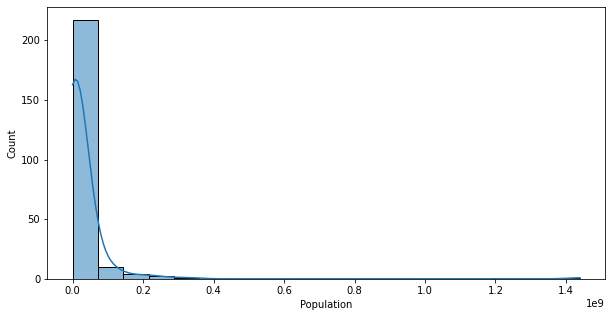

In [35]:
# Here we are using hist plot 
plt.figure(figsize=(10,5))
sns.histplot(x=WP['Population'],bins=20, kde=True)

In [68]:
WP.Population.skew()

11.588911938696539

#As we can observed in the Histogram, the data is **Highly Skewed.**

* **median age**





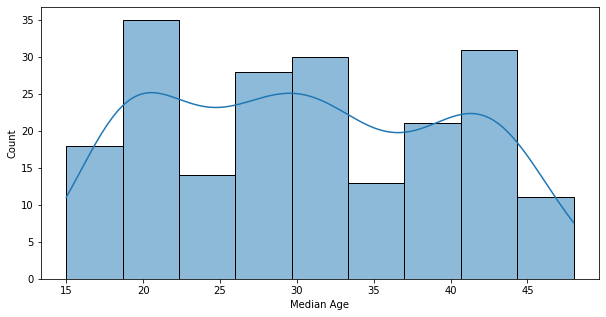

In [73]:
# Here we are using hist plot 
plt.figure(figsize=(10,5))
sns.histplot(x=WP['Median Age'], kde=True)

In [92]:
WP['Median Age'].skew()

0.10846046956111796

* As we can observed in the Histogram, the data is **Normally Distributed.**

* **Urban Population**

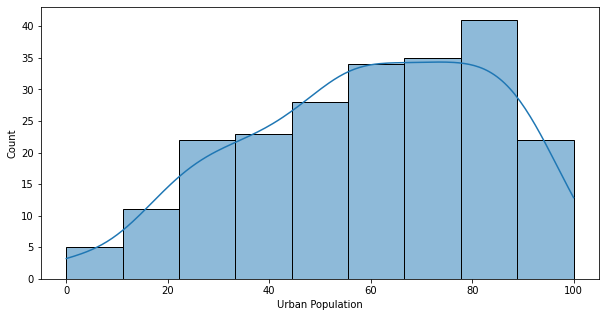

In [94]:
# Here we are using hist plot 
plt.figure(figsize=(10,5))
sns.histplot(x=WP['Urban Population'], kde=True)

In [102]:
WP["Urban Population"].skew()

-0.3749751329793345

#As we can observed in the Histogram, the data is **Normally Distributed**

* Yearly change

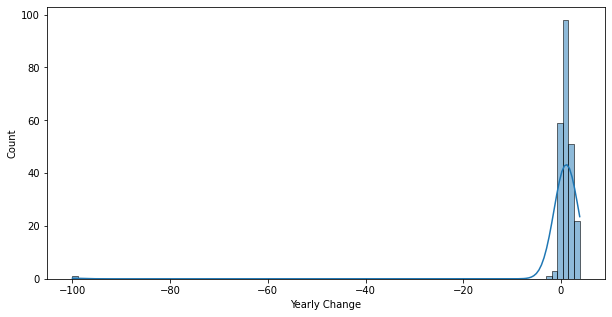

In [109]:
# Here we are using hist plot 
plt.figure(figsize=(10,5))
sns.histplot(x=WP['Yearly Change'],bins=90, kde=True)

In [110]:
WP["Yearly Change"].skew()

-14.732108935792477

As we can observed in the Histogram, the data is **Negatively skewed.**

#**11.Please sort the population column based on lowest populated countries and report bottom 10 countries as well as top 10 countries.**



In [36]:
#sorting the column based population countries
WP.sort_values(by = ['Population'], ascending = True)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
234,India,0,-100.00,-1366417754,0,2973190,-532687.0,2.2,28.0,NaN,0.00
24,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.00
197,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.00
189,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.00
113,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
160,Brazil,212559417,0.72,1509890,25,8358140,21200.0,1.7,33.0,88.0,2.73
156,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
142,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
119,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25


In [37]:
# sorting the values of population top 10 countries
WP.sort_values(by = ['Population'], ascending = False).head(10)


,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
194,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
119,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
142,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
156,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
160,Brazil,212559417,0.72,1509890,25,8358140,21200.0,1.7,33.0,88.0,2.73
164,Nigeria,206139589,2.58,5175990,226,910770,-60000.0,5.4,18.0,52.0,2.64
186,Bangladesh,164689383,1.01,1643222,1265,130170,-369501.0,2.1,28.0,39.0,2.11
193,Russia,145934462,0.04,62206,9,16376870,182456.0,1.8,40.0,74.0,1.87
202,Mexico,128932753,1.06,1357224,66,1943950,-60000.0,2.1,29.0,84.0,1.65
204,Japan,126476461,-0.30,-383840,347,364555,71560.0,1.4,48.0,92.0,1.62


In [38]:
# sorting the values of population bottom 10 countries
WP.sort_values(by = ['Population'], ascending = False).tail(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
223,Nauru,10824,0.63,68,541,20,NaN,NaN,NaN,NaN,0.0
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0.0,0.0
48,Saint Helena,6077,0.30,18,16,390,NaN,NaN,NaN,27.0,0.0
57,Saint Pierre & Miquelon,5794,-0.48,-28,25,230,NaN,NaN,NaN,100.0,0.0
78,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.0
113,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.0
189,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.0
197,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.0
24,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.0
234,India,0,-100.00,-1366417754,0,2973190,-532687.0,2.2,28.0,NaN,0.0


#Part 2:
#1.Create the following two classes (standard and student) with the given attributes and methods
Standard -
* Attributes: Std name, No of enrolled students, Overall GPA
* Methods: getStd, getEnrolled, getOGPA

In [45]:
# Standard class
class standard:
    def __init__(self,std_name,no_of_enrolled_students,OGPA):
        self.std_name = std_name
        self.no_of_enrolled_students = no_of_enrolled_students
        self.OGPA = OGPA
        
    def getStd(self):  # defining getStd method
        return self.std_name
    
    def getEnrolled(self): # defining getEnrolled method
        return self.no_of_enrolled_students
    
    def getOGPA(self):  # defining getOGPA method
        return  self.OGPA    
obj = standard("Ramakrishna", 77, 9)  

In [42]:
obj.getStd()

'Ramakrishna'

In [46]:
obj.getEnrolled()

77

In [47]:
obj. getOGPA()

9

#2.Students class with Standard as its super class  - 
* Attributes: Name,Roll No., Standard, Math marks, English Marks, 
Science Marks, Social Marks
* Methods: getName, getRollNo, getStd, getGPA


In [58]:
#Students class with Standard as its super class 
class Students(standard):
    def __init__(self,Name,Roll_No,Standard_name,Math_marks,English_marks,Science_marks,Social_marks): # defining constructor
            self.Name = Name
            self.Roll_No = Roll_No
            self.Standard_name = Standard_name
            self.Math_marks = Math_marks
            self.English_marks = English_marks
            self.Science_marks = Science_marks
            self.Social_marks = Social_marks
            
    def getName(self):
        return self.Name
    def getRollNo(self):
        return self.Roll_No
    def getStd(self):
        return self.Standard_name
    def getGPA(self):
        avg_marks = (self.Math_marks+self.English_marks+self.Science_marks+self.Social_marks)/4
        gpa = avg_marks/9
        return round(gpa,2)
obj1 = Students ('Ramakrishna', 21, '10th',66 , 75, 82, 90)    

In [52]:
obj1.getName()

'Ramakrishna'

In [53]:
obj1.getRollNo()

21

In [54]:
obj1.getStd()

'10th'

In [59]:
obj1.getGPA()

8.69

#3.Explanation:
* getName, getRollNo, getStd methods should give the name, roll number and standard of the student. 
* getGPA should give the average marks of math, english, science and social marks scaled to 10-points. The same applies to all the attributes and methods in the Standard superclass.

In [62]:
 # Creating objects for each class
 # creating object for Standard class first
std1 = standard('8th standard', 80,8.8 )
std2 = standard('7th standard', 85,7.7 )

# creating object for Students class
student1 = Students('Ram','77','8th standard',70,92,81,53)
student2 = Students('Sam','62','7th standard',71,80,64,90)

print("Name : ",student1.getName())
print("Roll No : ",student1.getRollNo())
print("Standard : ",student1.getStd())
print("GPA : ",student1.getGPA())

Name :  Ram
Roll No :  77
Standard :  8th standard
GPA :  8.22
